## Exercise: Boston Housing price regression dataset

Try to tackle this problem with a Deep Learning model built with Keras.

**Objectives**:
*   make sure you are able to build a deep learning model
*   make sure you can code a full training loop with a bit of hyperparameter search (model selection vs. model assessment)
*   make sure you are able to monitor training progress
*   make sure you can apply a minimum level of preprocessing (try to explore the dataset and see what kind of features you are dealing with)
*   make sure you can evaluate your model on unseen data

In [ ]:
from tensorflow import keras as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
from tensorflow.keras.layers import Normalization
from sklearn.model_selection import ParameterGrid

In [ ]:
(x, y), (x_test, y_test) = boston_housing.load_data(test_split=0.15)
print(x.shape, y.shape, x_test.shape, y_test.shape)
print(x.dtype, y.dtype, x_test.dtype, y_test.dtype)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
(430, 13) (430,) (76, 13) (76,)
float64 float64 float64 float64


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((365, 13), (65, 13), (365,), (65,))

In [ ]:
norm_layer = Normalization(axis=-1)
norm_layer.adapt(x_train)
normalized_x_train = norm_layer(x_train)
normalized_x_val = norm_layer(x_val)
print(np.mean(normalized_x_train), ' +- ', np.std(normalized_x_train))
print(np.mean(normalized_x_val), ' +- ', np.std(normalized_x_val))

-2.4118213e-08  +-  1.0
-0.054197486  +-  0.94235563


In [ ]:
norm_layer_y = Normalization(axis=None)
norm_layer_y.adapt(y_train)
normalized_y_train = norm_layer_y(y_train)
normalized_y_val = norm_layer_y(y_val)
normalized_y_test = norm_layer_y(y_test)
print(np.mean(normalized_y_train), ' +- ', np.std(normalized_y_train))
print(np.mean(normalized_y_val), ' +- ', np.std(normalized_y_val))
print(np.mean(normalized_y_test), ' +- ', np.std(normalized_y_test))

1.01899445e-07  +-  1.0
0.13573475  +-  1.0773416
0.17304665  +-  1.0577251


In [ ]:
def model_building(units = 64, learning_rate = 1e-3):
  model = K.Sequential()
  model.add(K.layers.Input(shape=(13,)))
  model.add(K.layers.Dense(units=units, activation='relu'))
  model.add(K.layers.Dense(units=1))
  model.compile(loss='mean_squared_error',
                optimizer=K.optimizers.Adam(learning_rate=learning_rate))

  return model

In [ ]:
model = model_building()
result = model.fit(normalized_x_train, normalized_y_train, epochs=10, batch_size = 10, validation_data=(normalized_x_val, normalized_y_val))

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.7269 - val_loss: 0.5055
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3606 - val_loss: 0.3432
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1792 - val_loss: 0.2993
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2532 - val_loss: 0.2886
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2090 - val_loss: 0.2687
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2250 - val_loss: 0.2538
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1621 - val_loss: 0.2470
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1722 - val_loss: 0.2455
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1281 - val_loss: 0.2306
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0954 - val_loss: 0.2271


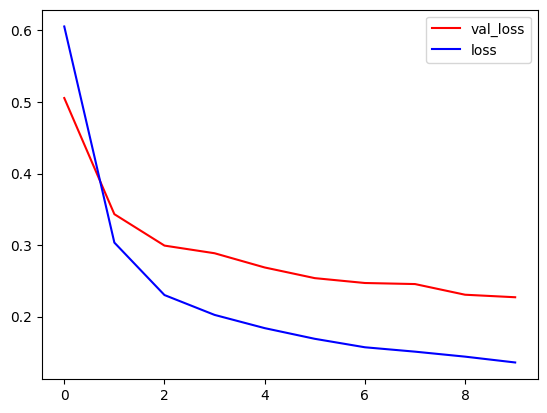

In [ ]:
plt.plot(result.history['val_loss'], c = 'r', label = 'val_loss')
plt.plot(result.history['loss'], c = 'b', label = 'loss')
plt.legend()
plt.show()

In [ ]:
grid = ParameterGrid({'units': [32, 64, 128], 'learning_rate': [1e-2, 1e-3, 1e-4]})

In [ ]:
grid_result_l = list()
for params in grid:
  grid_result = dict()
  model = model_building(**params)
  result = model.fit(normalized_x_train, normalized_y_train, epochs=10, batch_size = 10, validation_data=(normalized_x_val, normalized_y_val))
  grid_result['learning_rate'] = params['learning_rate']
  grid_result['units'] = params['units']
  grid_result['loss'] = result.history['loss'][-1]
  grid_result['val_loss'] = result.history['val_loss'][-1]
  grid_result_l.append(grid_result)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.9315 - val_loss: 0.3540
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1415 - val_loss: 0.2967
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1424 - val_loss: 0.2044
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0970 - val_loss: 0.1669
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1199 - val_loss: 0.1743
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1028 - val_loss: 0.1229
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1019 - val_loss: 0.1699
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0839 - val_loss: 0.1638
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0721 - val_loss: 0.1792
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1208 - val_loss: 0.1534
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.6287 - val_loss: 0.3271
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2573 - val_lo

In [ ]:
for elem in grid_result_l:
  print(elem)

{'learning_rate': 0.01, 'units': 32, 'loss': 0.0954008623957634, 'val_loss': 0.15342718362808228}
{'learning_rate': 0.01, 'units': 64, 'loss': 0.09774067252874374, 'val_loss': 0.12918056547641754}
{'learning_rate': 0.01, 'units': 128, 'loss': 0.09018458425998688, 'val_loss': 0.19647814333438873}
{'learning_rate': 0.001, 'units': 32, 'loss': 0.19933390617370605, 'val_loss': 0.37666556239128113}
{'learning_rate': 0.001, 'units': 64, 'loss': 0.13059939444065094, 'val_loss': 0.21112221479415894}
{'learning_rate': 0.001, 'units': 128, 'loss': 0.11888177692890167, 'val_loss': 0.20010428130626678}
{'learning_rate': 0.0001, 'units': 32, 'loss': 0.6515074968338013, 'val_loss': 1.3434498310089111}
{'learning_rate': 0.0001, 'units': 64, 'loss': 0.5853484869003296, 'val_loss': 0.6666185855865479}
{'learning_rate': 0.0001, 'units': 128, 'loss': 0.3290063738822937, 'val_loss': 0.49753066897392273}


In [ ]:
min_val_loss = np.inf
for elem in grid_result_l:
  if elem['val_loss'] < min_val_loss:
    min_val_loss = elem['val_loss']
    best_params = elem

print(best_params)

{'learning_rate': 0.01, 'units': 64, 'loss': 0.09774067252874374, 'val_loss': 0.12918056547641754}


In [ ]:
norm_layer_x = Normalization(axis=-1)
norm_layer_x.adapt(x)
normalized_x = norm_layer(x)
normalized_x_test = norm_layer(x_test)
print(np.mean(normalized_x), ' +- ', np.std(normalized_x))
print(np.mean(normalized_x_test), ' +- ', np.std(normalized_x_test))

-0.008192662  +-  0.9916914
0.020338202  +-  1.0015303


In [ ]:
norm_layer_y_tot = Normalization(axis=None)
norm_layer_y_tot.adapt(y)
normalized_y = norm_layer_y_tot(y)
normalized_y_test = norm_layer_y_tot(y_test)
print(np.mean(normalized_y), ' +- ', np.std(normalized_y))
print(np.mean(normalized_y_test), ' +- ', np.std(normalized_y_test))

1.1089236e-08  +-  1.0
0.1505358  +-  1.0439061


In [ ]:
best_model = model_building(units=64, learning_rate=0.01)
best_result = best_model.fit(normalized_x, normalized_y, epochs=10, batch_size = 10, validation_split=0.15)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7604 - val_loss: 0.1107
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1929 - val_loss: 0.1703
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1457 - val_loss: 0.1115
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1608 - val_loss: 0.1179
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1252 - val_loss: 0.1009
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0953 - val_loss: 0.1772
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1326 - val_loss: 0.1556
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1187 - val_loss: 0.1253
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1041 - val_loss: 0.1029
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1040 - val_loss: 0.1247


In [ ]:
metrics = best_model.evaluate(normalized_x_test, normalized_y_test)
metrics

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2385
0.3229905962944031


In [ ]:
predictions = best_model.predict(normalized_x_test[:20])
print(predictions*np.std(y)+np.mean(y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[31.03384851]
 [27.42988922]
 [10.15099714]
 [19.20279877]
 [20.38081188]
 [14.6895012 ]
 [34.94125301]
 [22.91821879]
 [20.32397698]
 [ 9.41930417]
 [16.55766075]
 [20.16884187]
 [18.59462933]
 [25.90528351]
 [26.94859715]
 [26.77776598]
 [15.42693165]
 [40.31553907]
 [27.45636629]
 [23.3514237 ]]


In [ ]:
print(y_test[:20])

[27.5 30.1  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5
 33.  28.4 14.1 46.7 32.5 29.6]


# Autoencoder

## Denoising
Build a denoising autoencoder which is able to reconstruct MNIST digits. Just add some [random Gaussian](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) noise to the input and reconstruct its denoised, original version.

In [77]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as K
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

In [79]:
# let's load the data
(X_dev, y_dev), (X_test, y_test) = K.datasets.mnist.load_data()

# we'll print the dimensions of the two datasets we just loaded
print(f"Development set shape -> X={X_dev.shape} y={y_dev.shape}")
print(f"Test set shape        -> X={X_test.shape} y={y_test.shape}")

Development set shape -> X=(60000, 28, 28) y=(60000,)
Test set shape        -> X=(10000, 28, 28) y=(10000,)


In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=10000, stratify=y_dev)

In [81]:
def build_denoising_autoencoder(units = 784):
    model = K.Sequential()
    model.add(K.layers.Input(shape=(784,)))
    model.add(K.layers.Dense(units=units, activation="relu"))
    model.add(K.layers.Dense(units=784, activation="linear"))

    return model

In [82]:
model = build_denoising_autoencoder()

In [83]:
model.compile(loss='mean_squared_error', optimizer=K.optimizers.RMSprop(learning_rate=0.001))

In [84]:
def add_gaussian_noise(X, scaling_factor):
    # create a gaussian noise matrix of the same size as the input X
    gaussian_noise = np.random.randn(X.shape[0], X.shape[1])

    # apply the (scaled) noise
    X_noisy = X + scaling_factor * gaussian_noise

    return X_noisy

In [85]:
X_train_flatten = X_train.reshape(-1, 784)
X_val_flatten = X_val.reshape(-1, 784)
X_test_flatten = X_test.reshape(-1, 784)

In [86]:
X_train_pp = X_train_flatten * (1/255)
X_val_pp = X_val_flatten * (1/255)
X_test_pp = X_test_flatten * (1/255)

In [87]:
# let's apply the noise to our matrices
# I'll use a factor of 0.2 (but values < 0.5 should be fine in general)
X_train_noisy = add_gaussian_noise(X_train_pp, scaling_factor=0.2)
X_val_noisy = add_gaussian_noise(X_val_pp, scaling_factor=0.2)

In [88]:
results = model.fit(
  X_train_noisy,   # our noisy data matrix (the input)
  X_train_pp,         # our original data matrix (the output)
  batch_size=128,
  epochs=5,
  shuffle=True,
  validation_data=(X_val_noisy, X_val_pp),
  verbose=1
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0622 - val_loss: 0.0309
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0283 - val_loss: 0.0227
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0214 - val_loss: 0.0188
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0180 - val_loss: 0.0166
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - val_loss: 0.0151


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


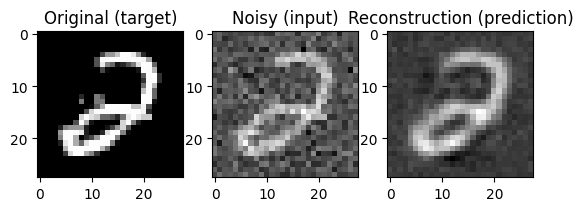

In [91]:
def show_noisy_reconstruction(X, X_noisy, X_rec):
    X = X.reshape(-1, 28, 28)
    X_noisy = X_noisy.reshape(-1, 28, 28)
    X_rec = X_rec.reshape(-1, 28, 28)

    fig, axs = plt.subplots(1, 3)
    rand_idx = np.random.choice(X.shape[0])

    axs[0].imshow(X[rand_idx], cmap='gray', interpolation='none')
    axs[0].set_title("Original (target)")
    axs[1].imshow(X_noisy[rand_idx], cmap='gray', interpolation='none')
    axs[1].set_title("Noisy (input)")
    axs[2].imshow(X_rec[rand_idx], cmap='gray', interpolation='none')
    axs[2].set_title("Reconstruction (prediction)")

X_val_rec = model.predict(X_val_noisy)
show_noisy_reconstruction(X_val, X_val_noisy, X_val_rec)

# Computer Vision: Exercises

## Exercise: training a LeNet on CIFAR-10

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow import keras as K
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

In [48]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

In [49]:
print(x_dev.shape, y_dev.shape, np.min(y_dev), np.max(y_dev))
print(x_dev.dtype, np.min(x_dev), np.max(x_dev))

(50000, 32, 32, 3) (50000, 1) 0 9
uint8 0 255


In [50]:
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, test_size=0.15, stratify= y_dev)

In [51]:
print(x_train.shape, y_train.shape, np.min(y_train), np.max(y_train))
print(x_train.dtype, np.min(x_train), np.max(x_train))

(42500, 32, 32, 3) (42500, 1) 0 9
uint8 0 255


In [52]:
def build_lenet5(filters1 = 6, filters2 = 16, filters3 = 120, units = 84):
    model = K.Sequential()
    model.add(K.layers.Input(shape=(32, 32, 3)))
    model.add(K.layers.Rescaling(scale=1/255))
    model.add(K.layers.Conv2D(filters=filters1, kernel_size=(5,5), padding='same', activation='tanh'))
    model.add(K.layers.MaxPool2D(strides=2))
    model.add(K.layers.Conv2D(filters=filters2, kernel_size=(5,5), padding='valid', activation='tanh'))
    model.add(K.layers.MaxPool2D(strides=2))
    model.add(K.layers.Conv2D(filters=filters3, kernel_size=(5,5), padding='valid', activation='tanh'))
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(units, activation='tanh'))
    model.add(K.layers.Dense(10, activation='softmax'))
    return model

In [53]:
grid = ParameterGrid({'filters1': [6, 12], 'filters2': [16, 32], 'filters3': [120, 240], 'units': [84]})

In [54]:
grid_result_l = list()
for params in grid:
  grid_result = dict()
  lenet5_model = build_lenet5(**params)
  lenet5_model.compile(loss='sparse_categorical_crossentropy', optimizer=K.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])
  results = lenet5_model.fit(x_train, y_train, epochs=3, batch_size = 128, validation_data=(x_val, y_val))
  grid_result['filters1'] = params['filters1']
  grid_result['filters2'] = params['filters2']
  grid_result['filters3'] = params['filters3']
  grid_result['units'] = params['units']
  grid_result['loss'] = results.history['loss'][-1]
  grid_result['val_loss'] = results.history['val_loss'][-1]
  grid_result['accuracy'] = results.history['accuracy'][-1]
  grid_result['val_accuracy'] = results.history['val_accuracy'][-1]
  grid_result_l.append(grid_result)

Epoch 1/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3518 - loss: 1.7862 - val_accuracy: 0.4815 - val_loss: 1.4393
Epoch 2/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5036 - loss: 1.3953 - val_accuracy: 0.5201 - val_loss: 1.3423
Epoch 3/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5448 - loss: 1.2799 - val_accuracy: 0.5435 - val_loss: 1.3015
Epoch 1/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.3618 - loss: 1.7715 - val_accuracy: 0.4392 - val_loss: 1.5903
Epoch 2/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5024 - loss: 1.4084 - val_accuracy: 0.4987 - val_loss: 1.4046
Epoch 3/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5443 - loss: 1.2781 - val_accuracy: 0.5356 - val_loss: 1.3111
Epoch 1/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3467 - loss: 1.8169 - val_accuracy: 0.4723 - val_loss: 1.4926
Epoch 2/3
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5079 - loss: 1.3756 - val_accuracy: 0.5368

In [19]:
for elem in grid_result_l:
  print(elem)

{'filters1': 6, 'filters2': 16, 'filters3': 120, 'units': 84, 'loss': 1.282786250114441, 'val_loss': 1.2547565698623657, 'accuracy': 0.546470582485199, 'val_accuracy': 0.5581333041191101}
{'filters1': 6, 'filters2': 16, 'filters3': 240, 'units': 84, 'loss': 1.3083535432815552, 'val_loss': 1.330175518989563, 'accuracy': 0.5405411720275879, 'val_accuracy': 0.5286666750907898}
{'filters1': 6, 'filters2': 32, 'filters3': 120, 'units': 84, 'loss': 1.2534948587417603, 'val_loss': 1.2058311700820923, 'accuracy': 0.5589176416397095, 'val_accuracy': 0.5776000022888184}
{'filters1': 6, 'filters2': 32, 'filters3': 240, 'units': 84, 'loss': 1.3150166273117065, 'val_loss': 1.3717905282974243, 'accuracy': 0.5391294360160828, 'val_accuracy': 0.5123999714851379}
{'filters1': 12, 'filters2': 16, 'filters3': 120, 'units': 84, 'loss': 1.2716047763824463, 'val_loss': 1.2378225326538086, 'accuracy': 0.551764726638794, 'val_accuracy': 0.5693333148956299}
{'filters1': 12, 'filters2': 16, 'filters3': 240, 'un

In [55]:
max_val_accuracy = -np.inf
for elem in grid_result_l:
  if elem['val_accuracy'] > max_val_accuracy:
    max_val_accuracy = elem['val_accuracy']
    best_params = elem

print(best_params)

{'filters1': 12, 'filters2': 32, 'filters3': 120, 'units': 84, 'loss': 1.1322853565216064, 'val_loss': 1.242324709892273, 'accuracy': 0.6020705699920654, 'val_accuracy': 0.5644000172615051}


In [56]:
lenet5_model = build_lenet5(filters1= 12, filters2 = 32, filters3=120, units=84)
lenet5_model.compile(loss='sparse_categorical_crossentropy', optimizer=K.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])
results = lenet5_model.fit(x_train, y_train, epochs=10, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3494 - loss: 1.7977 - val_accuracy: 0.4027 - val_loss: 1.6583
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5221 - loss: 1.3477 - val_accuracy: 0.5619 - val_loss: 1.2381
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5898 - loss: 1.1639 - val_accuracy: 0.5916 - val_loss: 1.1705
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6293 - loss: 1.0626 - val_accuracy: 0.5848 - val_loss: 1.1611
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6455 - loss: 1.0133 - val_accuracy: 0.6115 - val_loss: 1.1124
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6696 - loss: 0.9480 - val_accuracy: 0.6264 - val_loss: 1.0698
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6794 - loss: 0.9104 - val_accuracy: 0.6156 - val_loss: 1.1008
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.8523 - val_accuracy: 

In [57]:
lenet5_model = build_lenet5(filters1= 12, filters2 = 32, filters3=120, units=84)
lenet5_model.compile(loss='sparse_categorical_crossentropy', optimizer=K.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])
results = lenet5_model.fit(x_dev, y_dev, epochs=10, batch_size = 128, validation_split=0.15)

Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3640 - loss: 1.7634 - val_accuracy: 0.4815 - val_loss: 1.4336
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5157 - loss: 1.3552 - val_accuracy: 0.5645 - val_loss: 1.2391
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5845 - loss: 1.1769 - val_accuracy: 0.5932 - val_loss: 1.1537
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6133 - loss: 1.0916 - val_accuracy: 0.5715 - val_loss: 1.2186
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6410 - loss: 1.0348 - val_accuracy: 0.5903 - val_loss: 1.1620
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6681 - loss: 0.9520 - val_accuracy: 0.6215 - val_loss: 1.0852
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6890 - loss: 0.8943 - val_accuracy: 0.5957 - val_loss: 1.1632
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6938 - loss: 0.8786 - val_accuracy: 0

In [58]:
metrics = lenet5_model.evaluate(x_test, y_test)
metrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6467 - loss: 1.0379


[1.0482596158981323, 0.6442000269889832]

## Exercise: transfer learning with pretrained model

In [25]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Resizing

In [ ]:
def get_model(trainable=False):
  eff = EfficientNetB0(weights="imagenet", include_top=False)
  eff.trainable = trainable # The pretrained model's weights are frozen

  model = tf.keras.Sequential()
  model.add(K.layers.Input(shape=(32, 32, 3)))
  model.add(Resizing(width=224, height=224))
  model.add(eff)
  model.add(K.layers.Flatten())
  model.add(K.layers.Dense(10, activation="softmax"))
  return model

In [29]:
model = get_model(trainable=False)
# you can use larger learning rate
model.compile(optimizer=K.optimizers.Adam(1e-2), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │       627,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,676,781 (17.84 MB)

 Trainable params: 627,210 (2.39 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [30]:
model.fit(x_train, y_train, epochs=2, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/2
333/333 ━━━━━━━━━━━━━━━━━━━━ 92s 204ms/step - accuracy: 0.7994 - loss: 10.8000 - val_accuracy: 0.8599 - val_loss: 11.9067
Epoch 2/2
333/333 ━━━━━━━━━━━━━━━━━━━━ 101s 122ms/step - accuracy: 0.9167 - loss: 5.6192 - val_accuracy: 0.8895 - val_loss: 10.8210


In [31]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.8863 - loss: 13.0673


[12.358405113220215, 0.8860999941825867]